In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt

In [2]:
from pyts.datasets import load_gunpoint
from pyts.image import GramianAngularField

In [4]:
from multiprocessing import Pool, cpu_count
import os

In [25]:
import datetime

In [11]:
pd.set_option('display.max_rows', 10000)

In [7]:
data_path = '../../data/TSLA/ProcData'
vol_data = 'data_vol.csv'
fp = os.path.join(data_path, vol_data)
data = pd.read_csv(fp, parse_dates=['date'])
# data.set_index('time', inplace=True)

In [8]:
data.head()

,date,Volatility
0,2021-01-15,1.20796
1,2021-01-15,0.52396
2,2021-01-15,0.36396
3,2021-01-15,0.31396
4,2021-01-15,0.28400


In [14]:
data.time[0].date()

datetime.date(2020, 4, 23)

In [22]:
data.date.value_counts(sort=False).sort_index().min()

7

In [19]:
temp = data.groupby('date', as_index=True)['Volatility'].apply(list).to_frame()

In [23]:
date_feat_df = pd.DataFrame(temp['Volatility'].to_list(), index=temp.index)
date_feat_df.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
date,,,,,,,,,,,,,,,,,,,,,
2019-01-30,0.0646,0.0646,0.0802,0.079600,0.055600,0.026000,0.026000,0.006400,0.001200,0.005200,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-01-31,0.0328,0.0528,0.0648,0.087600,0.106800,0.110800,0.110804,0.100404,0.097604,0.102004,...,0.0204,0.024,0.0214,0.0374,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-01,0.1064,0.0792,0.0336,0.026000,0.032000,0.032000,0.032000,0.032000,0.012000,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-04,0.0004,0.0020,0.0080,0.010000,0.022000,0.028800,0.029200,0.026000,0.039600,0.043600,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-05,0.0160,0.0160,0.0360,0.033808,0.033808,0.020208,0.020208,0.000208,0.000000,0.000800,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
# temp df for inspection
date_feat_full = date_feat_df.dropna(axis=0)
date_feat_full.head()

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
date,,,,,,,,,,,,,,,,,,,,,
2019-04-04,0.0332,0.0488,0.0764,0.0948,0.1276,0.135200,0.143200,0.121600,0.125200,0.114800,...,0.124400,0.120400,0.136800,0.149600,0.154400,0.149200,0.144800,0.142400,0.167600,0.1592
2019-05-02,0.1300,0.1216,0.1040,0.1060,0.1088,0.083604,0.083604,0.096404,0.076404,0.105472,...,0.089600,0.094400,0.098400,0.122800,0.155600,0.129600,0.126400,0.126400,0.126400,0.0784
2019-05-23,0.0572,0.1608,0.1752,0.2112,0.2576,0.288800,0.216048,0.247648,0.260848,0.287648,...,0.102792,0.090392,0.064392,0.055996,0.056796,0.043196,0.047596,0.057196,0.061596,0.0572
2019-06-06,0.0468,0.0476,0.0532,0.0608,0.0580,0.060280,0.053480,0.050280,0.044280,0.045080,...,0.039204,0.031604,0.032604,0.047004,0.049900,0.065100,0.097900,0.112500,0.120500,0.1492
2019-07-03,0.0456,0.0492,0.0568,0.0304,0.0412,0.048000,0.047600,0.046000,0.042804,0.044004,...,0.053892,0.057492,0.060692,0.068692,0.066000,0.072000,0.057600,0.049600,0.035200,0.0208


In [52]:
temp_46 = date_feat_df.reset_index().iloc[0].dropna().to_frame().T.set_index("date")
temp_46

,0,1,2,3,4,5,6,7,8,9,...,36,37,38,39,40,41,42,43,44,45
date,,,,,,,,,,,,,,,,,,,,,
2019-01-30,0.0646,0.0646,0.0802,0.0796,0.0556,0.026,0.026,0.0064,0.0012,0.0052,...,0.01674,0.0032,0.0092,0.0072,0.0072,0.0072,0.0224,0.0164,0.015204,0.020004


In [53]:
temp_full_61 = date_feat_full.reset_index().iloc[0].to_frame().T.set_index("date")
temp_full_61

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
date,,,,,,,,,,,,,,,,,,,,,
2019-04-04,0.0332,0.0488,0.0764,0.0948,0.1276,0.1352,0.1432,0.1216,0.1252,0.1148,...,0.1244,0.1204,0.1368,0.1496,0.1544,0.1492,0.1448,0.1424,0.1676,0.1592


In [26]:
date_20200325 = data[data['time'].apply(lambda x:x.date())==datetime.date(2020, 4, 23)]

In [28]:
date_20200325.head()

,time,open,high,low,close,volume,Day_Perc_Change,Volatility
0,2020-04-23 09:30:00-04:00,145.25600,145.37400,145.25600,145.37400,43270,-0.151791,145.039104
1,2020-04-23 09:29:00-04:00,146.33800,146.33800,145.20000,145.20000,45200,-0.119691,145.070604
2,2020-04-23 09:24:00-04:00,146.44992,146.44992,146.44992,146.44992,3720,0.860826,145.464984
3,2020-04-23 09:23:00-04:00,146.36000,146.45000,146.34200,146.45000,19410,0.000055,145.813784
4,2020-04-23 09:22:00-04:00,146.30000,146.30000,146.30000,146.30000,3600,-0.102424,145.954784


In [6]:
# data.time[0]

In [35]:
data.time.max()-data.time.min()
# print(data.shape)

Timedelta('29 days 01:00:00')

In [20]:
data.isnull().sum()

open               0
high               0
low                0
close              0
volume             0
Day_Perc_Change    0
Volatility         0
dtype: int64

In [31]:
date_20200325 =date_20200325.set_index('time')

In [67]:
# Scale the data to be between -1 and 1
scaler = MinMaxScaler(feature_range=(-1,1))
df = scaler.fit_transform(temp_full_61)

In [68]:
# did not flatten the images
gadf = GramianAngularField(sample_range=(-1,1), method='difference')

In [69]:
# transform times series to images
# polar coordinate relationships
X_new = gadf.transform(df)
X_new.shape

(1, 61, 61)

In [70]:
X_new

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [72]:
X_new[1]

IndexError: index 1 is out of bounds for axis 0 with size 1

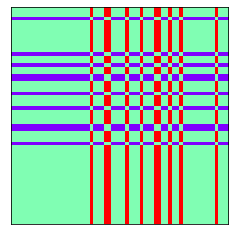

In [73]:
fig = plt.figure()
ax = plt.subplot(111)

fname = f'imgs/{1}.png'

ax.imshow(X_new[0], cmap='rainbow', origin='lower')
ax.set_title('')
ax.set_xticks([])
ax.set_yticks([])

fig.savefig(fname, bbox_inches='tight')

In [62]:
import matplotlib.pyplot as plt

In [66]:
# 46 features
plt.imread('imgs/0.png').shape

(235, 235, 4)

In [74]:
# 61 features
plt.imread('imgs/1.png').shape

(235, 235, 4)

In [75]:
def convert_img(idx):
    
    fig = plt.figure()
    ax = plt.subplot(111)
    
    try:
        fname = f'imgs/{idx}.png'
        if os.path.exists(fname):
            return
    except:
        return
    
    ax.imshow(X_new[idx], cmap='rainbow', origin='lower')
    ax.set_title('')
    ax.set_xticks([])
    ax.set_yticks([])
    
    fig.savefig(fname, bbox_inches='tight')

In [76]:
p = Pool(cpu_count())

In [39]:
p

<multiprocessing.pool.Pool state=RUN pool_size=8>

In [77]:
_ = p.map(convert_img, (i for i in range(1)))

KeyboardInterrupt: 